<a href="https://colab.research.google.com/github/QurratulainM/BharatIntern/blob/main/IrisClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Iris** **Classification**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [ ]:
data=pd.read_csv('/content/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
data=data.drop(columns=['Id'])

In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [ ]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

array([[<Axes: title={'center': 'SepalLengthCm'}>,
        <Axes: title={'center': 'SepalWidthCm'}>],
       [<Axes: title={'center': 'PetalLengthCm'}>,
        <Axes: title={'center': 'PetalWidthCm'}>]], dtype=object)

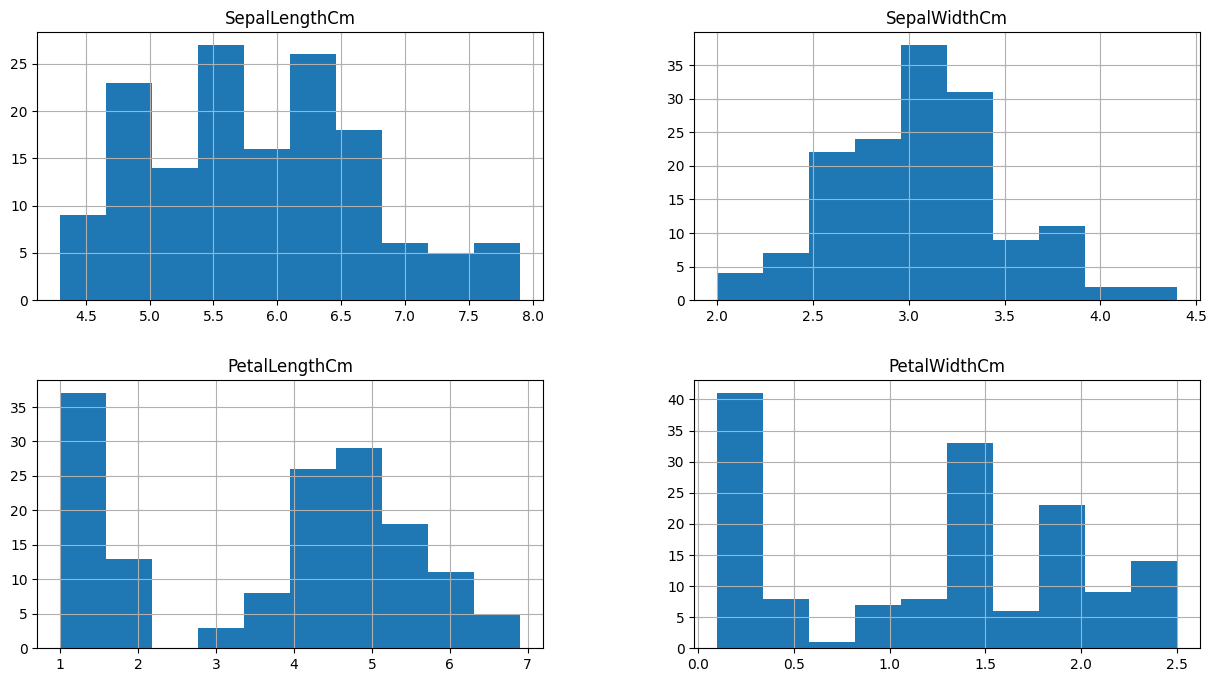

In [ ]:
vis=data.drop(columns=['Species'])
vis.hist(figsize=(15,8))

In [ ]:
colors=['green','deeppink','blue']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']

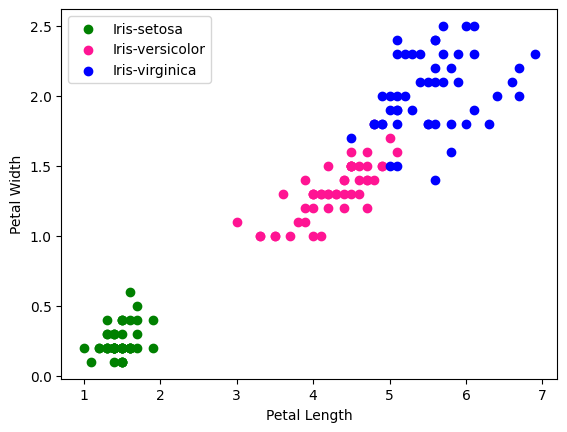

In [ ]:
for i in range(3):
  x=data[data['Species']==species[i]]
  plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

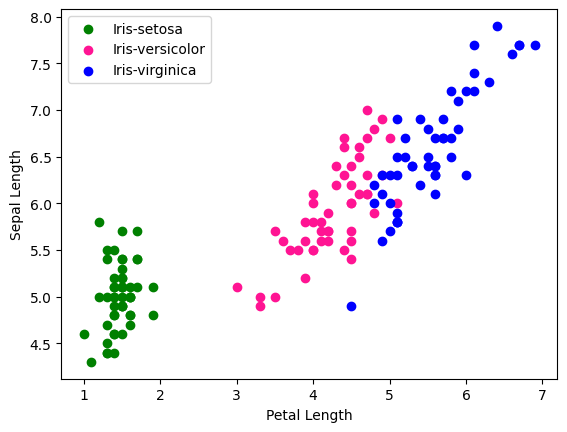

In [ ]:
for i in range(3):
  x=data[data['Species']==species[i]]
  plt.scatter(x['PetalLengthCm'],x['SepalLengthCm'],c=colors[i],label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Sepal Length")
plt.legend()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import linear_model

In [ ]:
le= LabelEncoder()
data['Species']=le.fit_transform(data['Species'])
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
X=data.drop(columns=['Species'])
Y=data['Species']
x_train, x_test, y_train, y_test=train_test_split(X,Y, test_size=0.30)

In [ ]:
Kmodel=KNeighborsClassifier()

In [ ]:
Kmodel.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = Kmodel.predict(x_test)

In [ ]:
print("Accuracy: ",Kmodel.score(x_test,y_test)*100)

Accuracy:  95.55555555555556


In [ ]:
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [ ]:
svm_model = SVC(kernel='rbf', C=1, gamma='auto')
svm_model.fit(x_train, y_train)
y_predi = svm_model.predict(x_test)

In [ ]:
print("Accuracy: ",svm_model.score(x_test,y_test)*100)

Accuracy:  93.33333333333333


In [ ]:
print('Classification Report:\n', classification_report(y_test, y_predi))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.89      0.94      0.92        18
           2       0.91      0.83      0.87        12

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [ ]:
logr_model = linear_model.LogisticRegression()
logr_model.fit(x_train, y_train)
y_predic = logr_model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("Accuracy: ",logr_model.score(x_test,y_test)*100)

Accuracy:  91.11111111111111


In [ ]:
print('Classification Report:\n', classification_report(y_test, y_predic))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.85      0.94      0.89        18
           2       0.90      0.75      0.82        12

    accuracy                           0.91        45
   macro avg       0.92      0.90      0.90        45
weighted avg       0.91      0.91      0.91        45

